In [198]:
import allantools
import matplotlib.pyplot as plt
import numpy as np
import math
from allantools import noise
plt.rcParams['figure.dpi'] = 300 #分辨率

Text(0.5, 1.0, 'Flicker FM noise 1/f')

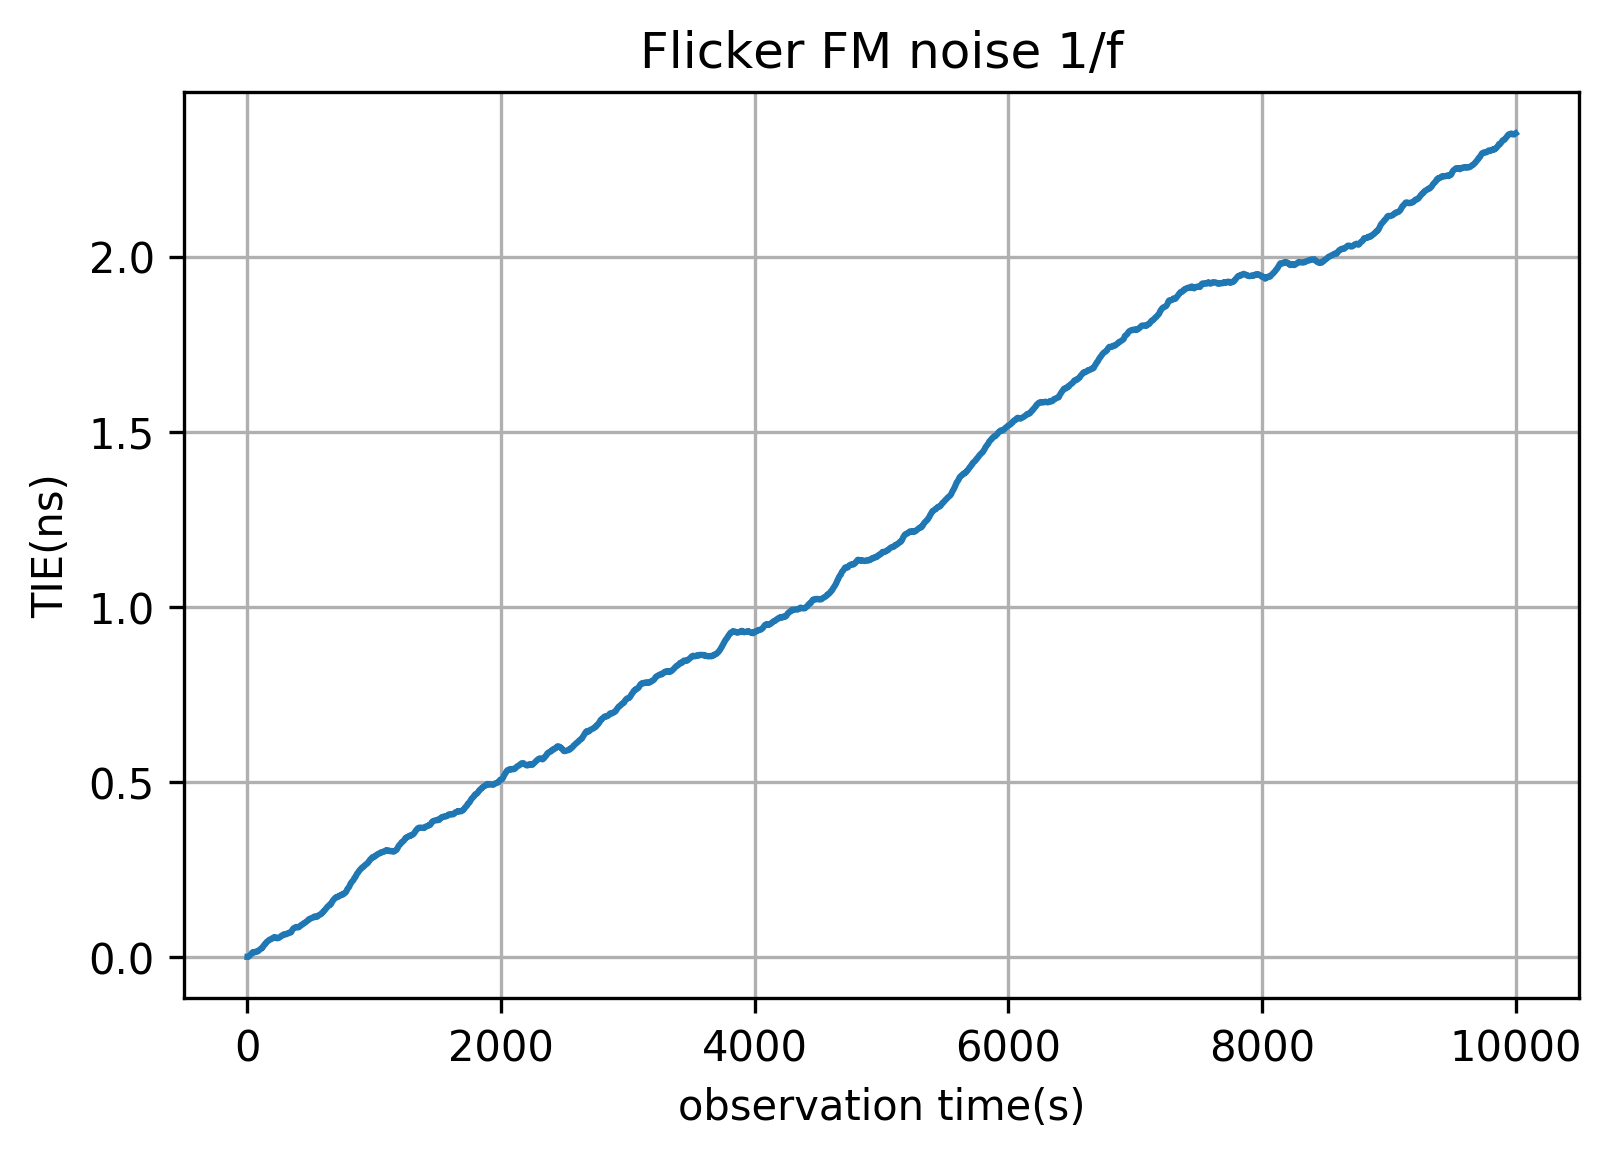

In [199]:
t = np.linspace(0, 10000, 10000)  # tau values from 1 to 1000
#plt.subplot(111, xscale="log", yscale="log")
N = 10000
# pink frequency noise => constant ADEV
freq_pink = noise.pink(N)
phase_pink = 1.e-4 * np.cumsum(noise.pink(N))  # integrate to get phase, color??
plt.plot(t,phase_pink)
plt.grid()
plt.xlabel('observation time(s)')
plt.ylabel('TIE(ns)')
plt.title('Flicker FM noise 1/f')

Text(0.5, 1.0, 'white FM noise f^0')

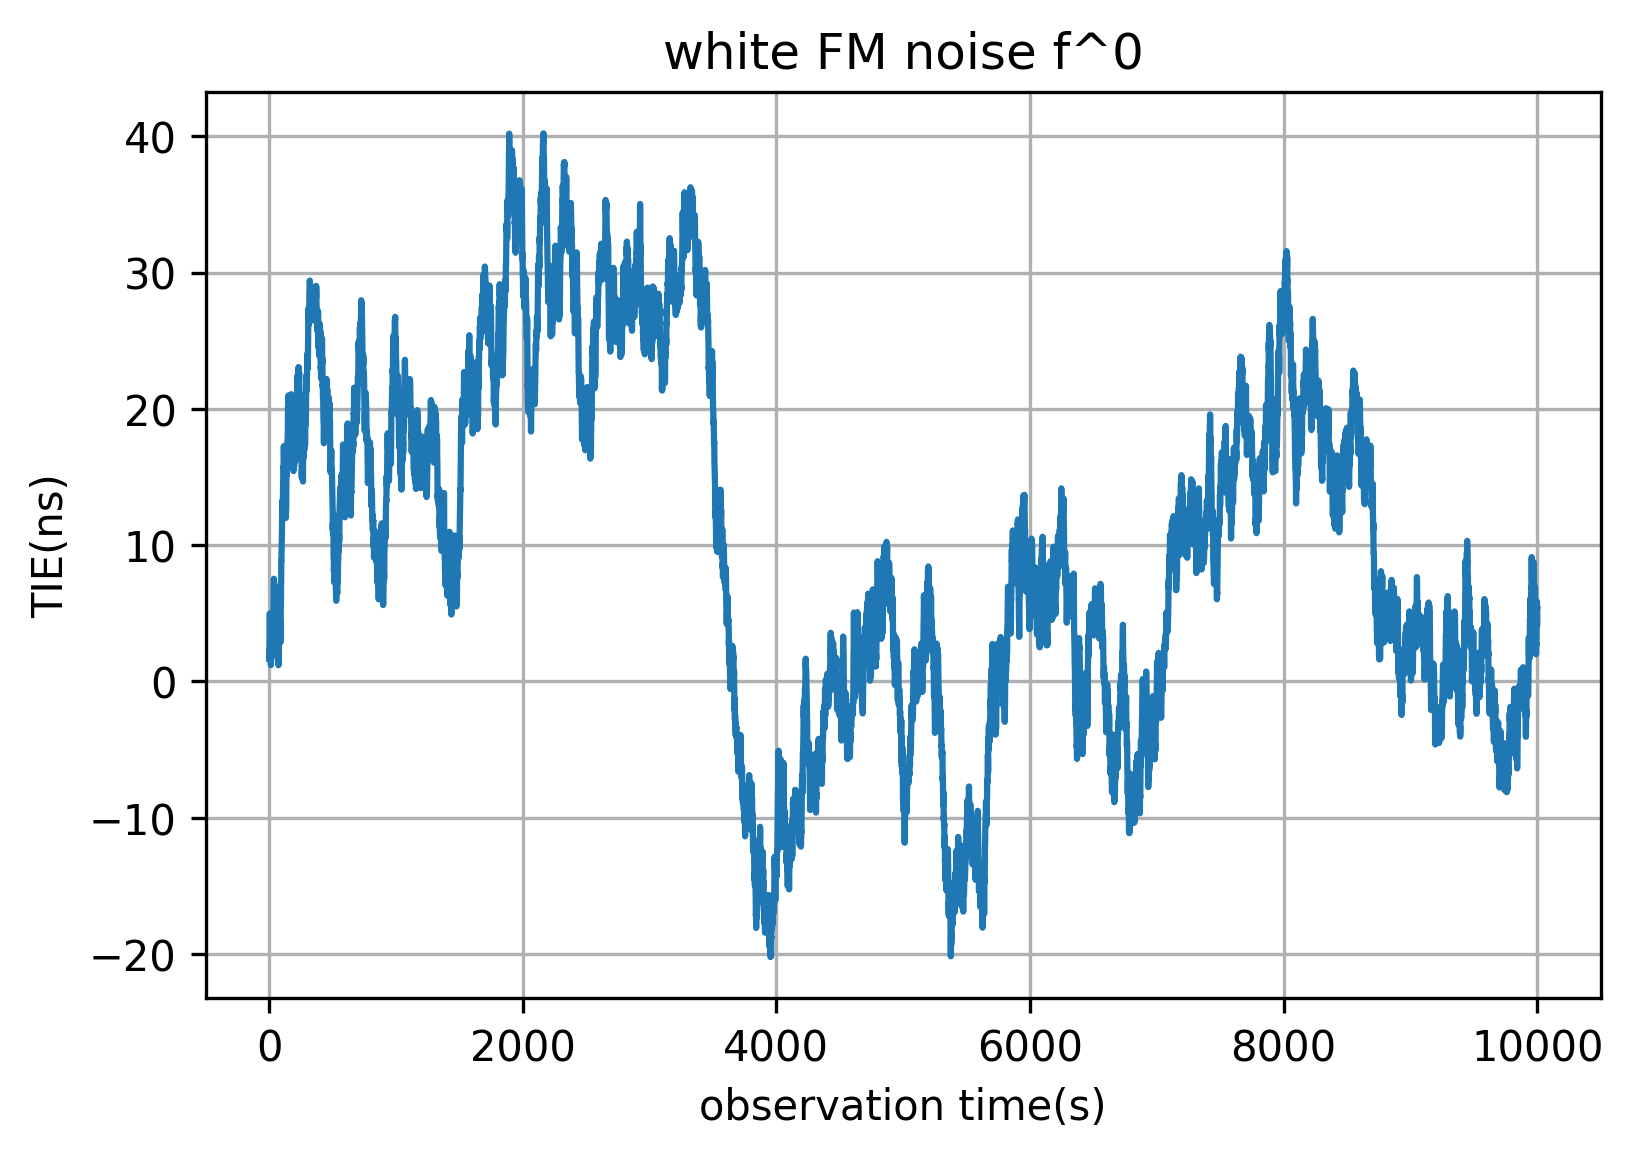

In [200]:
freq_white = noise.white(N)
phase_white = np.cumsum(noise.white(N))  # integrate to get phase, color??
plt.plot(t,phase_white)
plt.grid()
plt.xlabel('observation time(s)')
plt.ylabel('TIE(ns)')
plt.title('white FM noise f^0')

Text(0.5, 1.0, 'random walk FM noise 1/f^2')

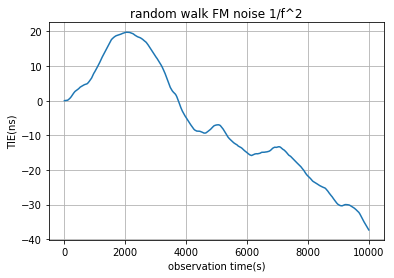

In [20]:
freq_brown = noise.brown(N)
phase_brown = 1.e-4 * np.cumsum(noise.brown(N))  # integrate to get phase, color??
plt.plot(t,phase_brown)
plt.grid()
plt.xlabel('observation time(s)')
plt.ylabel('TIE(ns)')
plt.title('random walk FM noise 1/f^2')

Text(0.5, 1.0, 'white PM noise f^2')

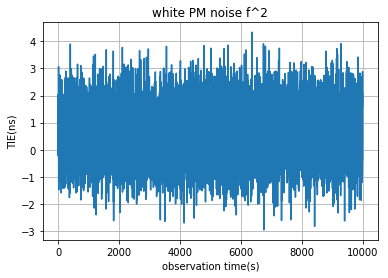

In [35]:
freq_violet = noise.violet(N)
phase_violet = np.cumsum(noise.violet(N))  # integrate to get phase, color??
plt.plot(t[0:9999],phase_violet)
plt.grid()
plt.xlabel('observation time(s)')
plt.ylabel('TIE(ns)')
plt.title('white PM noise f^2')

In [28]:
def flicker_pm(num_points):
    """ Flicker PM noise with f^1 PSD """
    return np.diff(noise.pink(num_points))

def flicker_walk_fm(num_points=1024, fs=1.0):
    """ Flicker walk FM noise with 1/f^3 PSD """
    return (1.0/float(fs))*np.cumsum(noise.pink(num_points))

def random_run_fm(num_points=1024, b2=1.0, fs=1.0):
    """ random run FM (diffusion) noise with 1/f^4 PSD
        (not really a color... rather Brownian or random-walk)

        N = number of samples
        b2 = desired PSD is b2*f^-2
        fs = sampling frequency

        we integrate brown-noise to get random run FM noise.

    """
    return (1.0/float(fs))*np.cumsum(noise.brown(num_points, b2*(4.0*math.pi*math.pi), fs=fs))


Text(0.5, 1.0, 'flicker PM noise f')

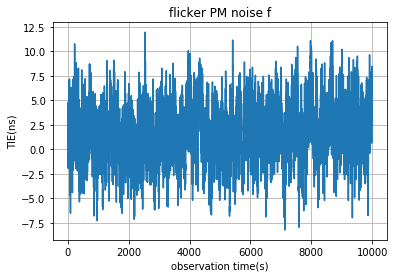

In [23]:
freq_flicker_pm = flicker_pm(N)
phase_flicker_pm = np.cumsum(flicker_pm(N))  # integrate to get phase, color??
plt.plot(t[0:9999],phase_flicker_pm)
plt.grid()
plt.xlabel('observation time(s)')
plt.ylabel('TIE(ns)')
plt.title('flicker PM noise f')

Text(0.5, 1.0, 'flicker walk FM noise 1/f^3')

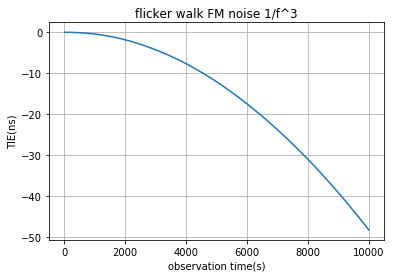

In [24]:
freq_flicker_walk_fm = flicker_walk_fm(N)
phase_flicker_walk_fm = 1.e-7 * np.cumsum(flicker_walk_fm(N))  # integrate to get phase, color??
plt.plot(t,phase_flicker_walk_fm)
plt.grid()
plt.xlabel('observation time(s)')
plt.ylabel('TIE(ns)')
plt.title('flicker walk FM noise 1/f^3')

Text(0.5, 1.0, 'random run FM noise 1/f^4')

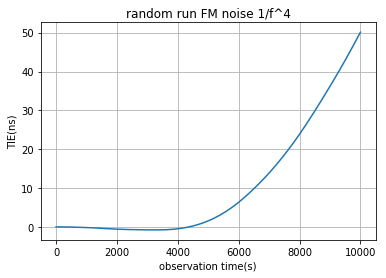

In [33]:
freq_random_run_fm = random_run_fm(N)
phase_random_run_fm = 1.e-9 * np.cumsum(random_run_fm(N))  # integrate to get phase, color??
plt.plot(t,phase_random_run_fm)
plt.grid()
plt.xlabel('observation time(s)')
plt.ylabel('TIE(ns)')
plt.title('random run FM noise 1/f^4')

In [41]:
print(phase_pink.shape)
print(phase_brown.shape)
print(phase_white.shape)
print(phase_violet.shape)
print(phase_flicker_pm.shape)
print(phase_flicker_walk_fm.shape)
print(phase_random_run_fm.shape)

(9999,)
(10000,)
(10000,)
(9999,)
(9999,)
(10000,)
(10000,)


In [175]:
def d_tie_noise(N, fs = 1.0, coff=[1.e-4,1.,1.e-4,1.,1.,1.e-9,1.e-11]):
    cof_white_pm = coff[0]
    cof_flicker_pm = coff[1]
    cof_white_fm = coff[2]
    cof_flicker_fm = coff[3]
    cof_random_walk_fm = coff[4]
    cof_flicker_walk_fm = coff[5]
    cof_random_run_fm = coff[6]
    phase_flicker_fm = cof_flicker_fm * np.cumsum(noise.pink(N))  # 1/f
    phase_white_fm = cof_white_fm * np.cumsum(noise.white(N,1.0,fs)) # f^0
    phase_random_walk_fm = cof_random_walk_fm * np.cumsum(noise.brown(N,1.0,fs)) # f^(-2)
    phase_white_pm= cof_white_pm * np.cumsum(noise.violet(N)) # f^2
    phase_flicker_pm = cof_flicker_pm * np.cumsum(flicker_pm(N)) # f
    phase_flicker_walk_fm = cof_flicker_walk_fm * np.cumsum(flicker_walk_fm(N,fs)) # f^(-3)
    phase_random_run_fm = cof_random_run_fm * np.cumsum(random_run_fm(N,1.0,fs)) # f^(-4)
    noise_comb = phase_flicker_fm[:N-1] + phase_white_fm[:N-1] + phase_random_walk_fm[:N-1] + phase_white_pm + phase_flicker_pm + phase_flicker_walk_fm[:N-1] + phase_random_run_fm[:N-1]
    return noise_comb

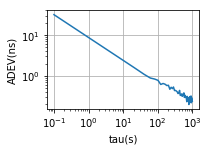

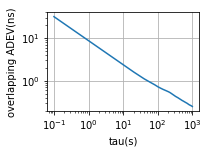

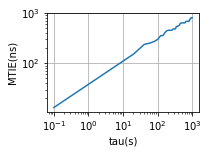

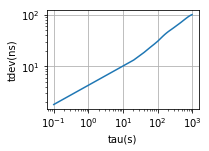

In [140]:
r = sample_rate
# tau = np.logspace(0, 3, 100)
tau = np.linspace(1/r, 1000, 50)
plt.figure()
plt.subplot(221)
(t1, ad, ade, adn) = allantools.adev(tie, rate=r, data_type="phase", taus=tau)  # Compute the overlapping ADEV
fig = plt.loglog(t1, ad) # Plot the results
plt.xlabel('tau(s)')
plt.ylabel('ADEV(ns)')
plt.grid()
plt.show()
plt.subplot(222)
(t2, ad, ade, adn) = allantools.oadev(tie, rate=r, data_type="phase", taus=tau)  # Compute the overlapping ADEV
fig = plt.loglog(t2, ad) # Plot the results
plt.xlabel('tau(s)')
plt.ylabel('overlapping ADEV(ns)')
plt.grid()
plt.show()
plt.subplot(223)
(t3, ad, ade, adn) = allantools.mtie(tie, rate=r, data_type="phase", taus=tau)  # Compute the overlapping ADEV
fig = plt.loglog(t3, ad) # Plot the results
plt.xlabel('tau(s)')
plt.ylabel('MTIE(ns)')
plt.grid()
plt.show()
plt.subplot(224)
(t4, ad, ade, adn) = allantools.tdev(tie, rate=r, data_type="phase", taus=tau)  # Compute the overlapping ADEV
fig = plt.loglog(t4, ad) # Plot the results
plt.xlabel('tau(s)')
plt.ylabel('tdev(ns)')
plt.grid()
plt.show()

In [179]:
def sync_tie_gen(span=1024, sample_rate = 1.0, offset=0.0, freq_offset = 1.0e-3, freq_drift = -1.0e-6, noise_coff=[-1.e-5,1.,1,1e-5,1e-5,0,0]):
    t = np.linspace(0, span, span*sample_rate)
    d_noise = d_tie_noise(int(span*sample_rate+1), sample_rate, noise_coff)
    tie_gen = offset + freq_offset * t + 0.5*freq_drift * t**2 + d_noise
    return t, tie_gen

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


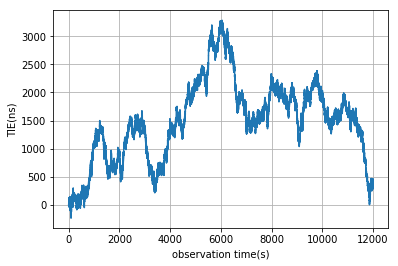

In [187]:
t, tie = sync_tie_gen(span = 12000,sample_rate = 33.3, offset=0.0, freq_offset = 0.0e-3, freq_drift = -0.0e-8,)
plt.plot(t, tie)
plt.grid()
plt.xlabel('observation time(s)')
plt.ylabel('TIE(ns)')
plt.show()

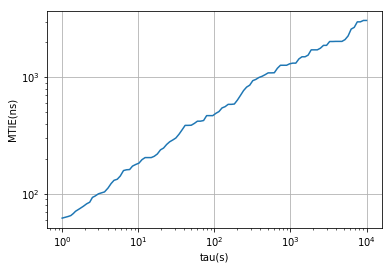

In [197]:
tau = np.logspace(0,4,100)
(t3, ad, ade, adn) = allantools.mtie(tie, rate=sample_rate, data_type="phase", taus=tau)  # Compute the overlapping ADEV
fig = plt.loglog(t3, ad) # Plot the results
plt.xlabel('tau(s)')
plt.ylabel('MTIE(ns)')
plt.grid()
plt.show()

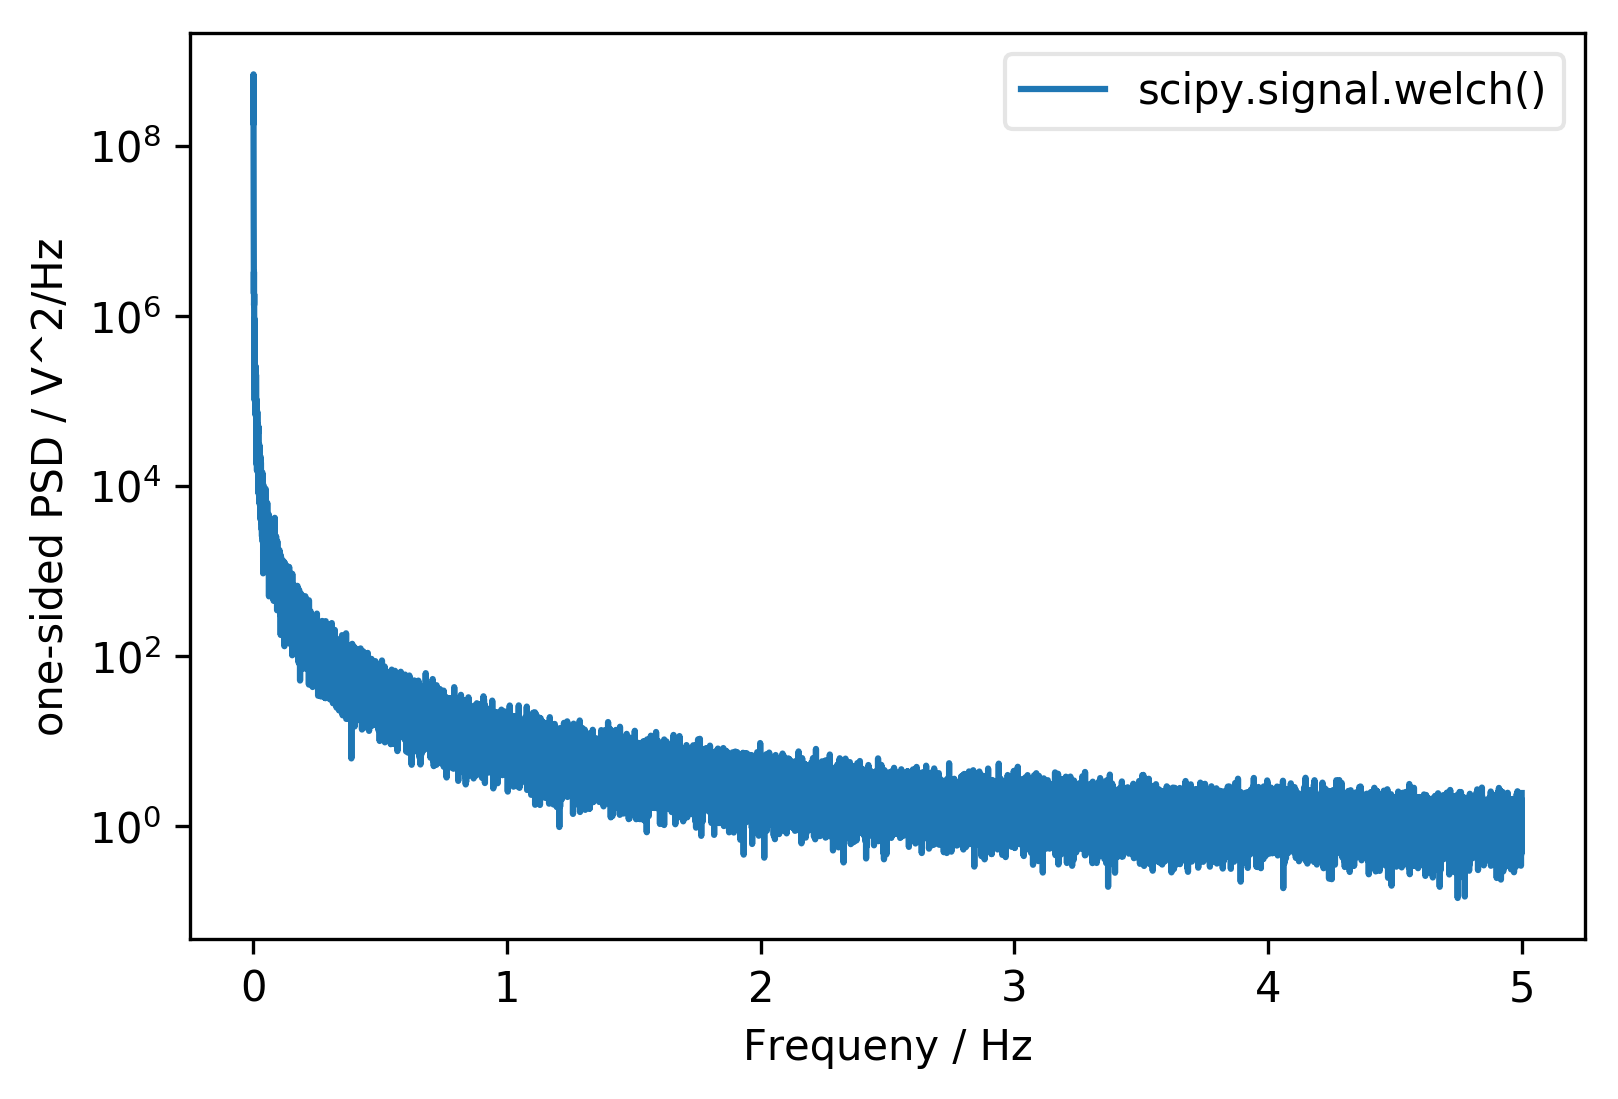

In [201]:
#f, psd = many_psds(k=50,fs=fs,b0=b0,N=N)

fxx, Pxx_den = noise.scipy_psd(tie, sample_rate)

plt.figure()
#plt.semilogy(f,psd,label='numpy.fft()')
plt.semilogy(fxx,Pxx_den,label='scipy.signal.welch()')
#plt.semilogy(f,[b0]*len(f),label='b_0 = %.3g' % b0 )
plt.legend(framealpha=0.5)
plt.xlabel('Frequeny / Hz')
plt.ylabel('one-sided PSD / V^2/Hz')
plt.show()